In [28]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

from src.general import *
from src.eda import *
from src.vae import *
assert keras.__version__ == '2.3.1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
config = configure_defaults()
show(config)

,value
n_species,16
min_species,2
species_order,abundance
training_data,petrer_limestone
testing_data,petrer_limestone
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


In [23]:
patches = get_patches(config, data = 'training_data')
patches

/Users/johannes/work/eco_transfer/outputs/petrer_limestone/petrer_limestone_patches.csv


,Fumana_thymifolia,Stipa_tenacissima,Helianthemum_violaceum,Brachypodium_retusum,Fumana_ericoides,Rosmarinus_officinalis,Helianthemum_syriacum,Teucrium_capitatum,Atractylis_cancellata,Teucrium_pseudochamaepitys,Phagnalon_rupestre,Teucrium_mola,Fumana_hispidula,Sedum_sediforme,Matthiola_fruticulosa,Thymus_vulgaris
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,True,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False
2,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False
4,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2126,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False
2127,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False
2128,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False


In [24]:
patches.mean()

Fumana_thymifolia             0.501408
Stipa_tenacissima             0.400469
Helianthemum_violaceum        0.313146
Brachypodium_retusum          0.290610
Fumana_ericoides              0.237089
Rosmarinus_officinalis        0.225822
Helianthemum_syriacum         0.212207
Teucrium_capitatum            0.202347
Atractylis_cancellata         0.161502
Teucrium_pseudochamaepitys    0.154930
Phagnalon_rupestre            0.101408
Teucrium_mola                 0.101408
Fumana_hispidula              0.093427
Sedum_sediforme               0.088732
Matthiola_fruticulosa         0.076995
Thymus_vulgaris               0.069014
dtype: float64

## Single model

In [25]:
vae, encoder, decoder = build_vae(config)#, n_vars = config['n_species'], n_tile = config['n_tile'], depth = config['depth'], n_latent = config['n_latent'],
                                        #   learning_rate = config['learning_rate'], fully_connected = config['fully_connected'], beta = config['beta'])
encoder.summary()

2023-05-23 13:12:05.769121: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2023-05-23 13:12:05.819658: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f802e674eb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-23 13:12:05.819677: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Model: "VAE_Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 16, 8, 1)     0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 8, 4, 32)     160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 4, 2, 64)     8256        conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 2, 1, 128)    32896       conv2d_2[0][0]                   
________________________________________________________________________________________

In [26]:
train_ds, val_ds, train_df, val_df = split_val(patches, val_split = config['val_split'])
train_df

,Fumana_thymifolia,Stipa_tenacissima,Helianthemum_violaceum,Brachypodium_retusum,Fumana_ericoides,Rosmarinus_officinalis,Helianthemum_syriacum,Teucrium_capitatum,Atractylis_cancellata,Teucrium_pseudochamaepitys,Phagnalon_rupestre,Teucrium_mola,Fumana_hispidula,Sedum_sediforme,Matthiola_fruticulosa,Thymus_vulgaris
0,True,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1061,True,True,False,True,False,True,True,False,False,False,False,False,False,True,True,False
1062,False,True,False,False,True,False,True,False,True,False,False,True,True,False,True,True
1063,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False


# Train multiple models at once

In [35]:
config = configure_defaults()
show(config)

,value
n_species,16
min_species,2
species_order,abundance
training_data,petrer_limestone
testing_data,petrer_limestone
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


In [ ]:
## Vary training set size

Epoch 200


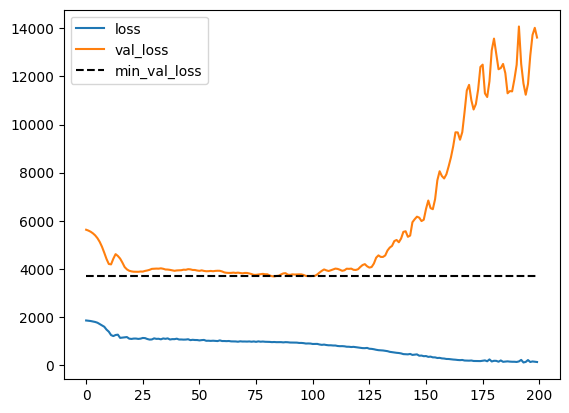

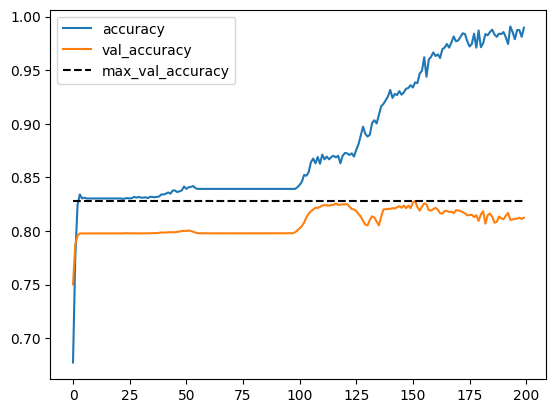

100%|█████████████████████████████████████████████████████████████| 24/24 [51:16<00:00, 128.18s/it]

Saving checkpoint and datasets in:
/Users/johannes/work/resecarin/models/bce/val_loss/petrer_limestone/train_from_scratch/n_species=16/depth=32/n_latent=16/val_split=0.99/2023-05-04_15-23-19


In [15]:
var = 'val_split'
config['n_bootstrap'] = 1
var_values = np.arange(.50, 1, .01)

scan_train(config, var, var_values)

## Train from scratch

In [18]:
config = configure_defaults()
show(config)

,0
n_species,16
min_species,2
species_order,abundance
training_data,petrer_limestone
testing_data,petrer_limestone
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


Epoch 200


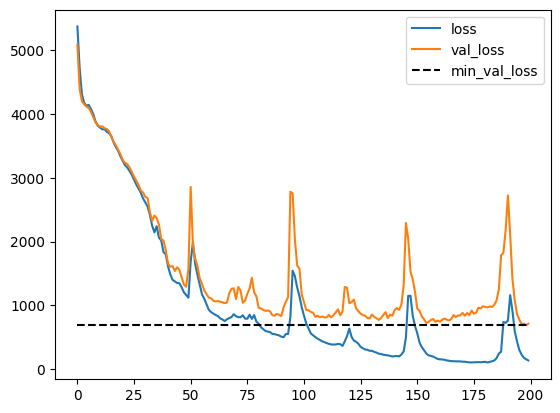

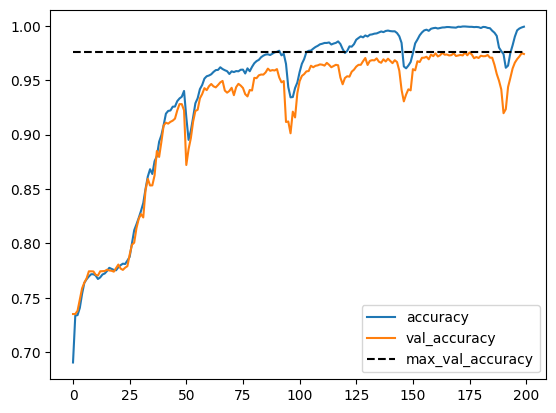

100%|███████████████████████████████████████████████████████████████| 1/1 [11:26<00:00, 686.19s/it]

Saving checkpoint and datasets in:
/Users/johannes/work/resecarin/models/bce/val_loss/mexico_all/train_from_scratch/n_species=16/depth=32/n_latent=16/val_split=0.50/2023-05-04_10-15-09


In [7]:
var = 'training_data'
var_values = ['mexico_all', 'union_patches']
scan_train(config, var, var_values)


## Train on Petrer, then tune on other datasets

In [36]:
config = configure_defaults()
show(config)

,value
n_species,16
min_species,2
species_order,abundance
training_data,petrer_limestone
testing_data,petrer_limestone
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


Epoch 50


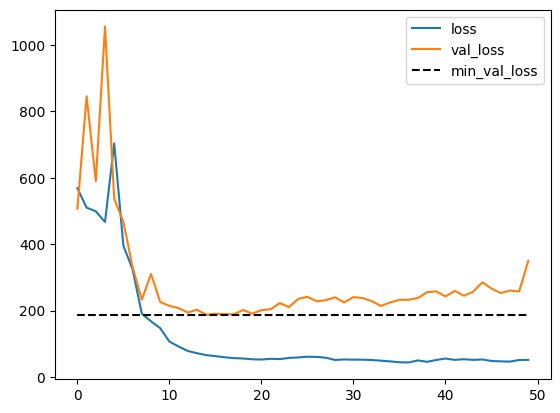

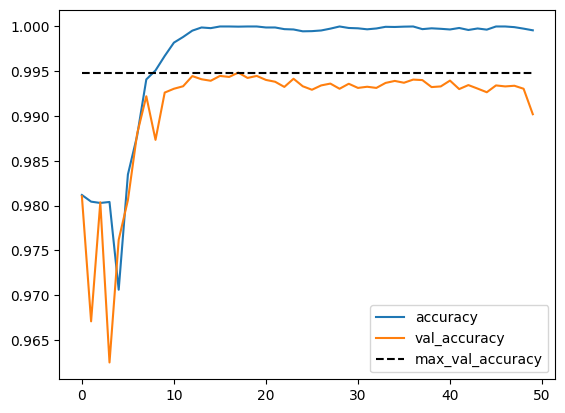

100%|███████████████████████████████████████████████████████████████| 6/6 [17:37<00:00, 176.29s/it]

Saving checkpoint and datasets in:
/Users/johannes/work/resecarin/models/bce/val_loss/mexico_all/tune_petrer_limestone/n_species=16/depth=32/n_latent=16/val_split=0.50/2023-05-04_11-34-27


In [11]:
tuning_data = 'mexico_all'
train_and_tune(config, initial_data = 'petrer_limestone', tuning_data = tuning_data)